In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [79]:
df = pd.read_csv("dataset.csv")
print(len(df))

540364


<AxesSubplot:ylabel='temperature'>

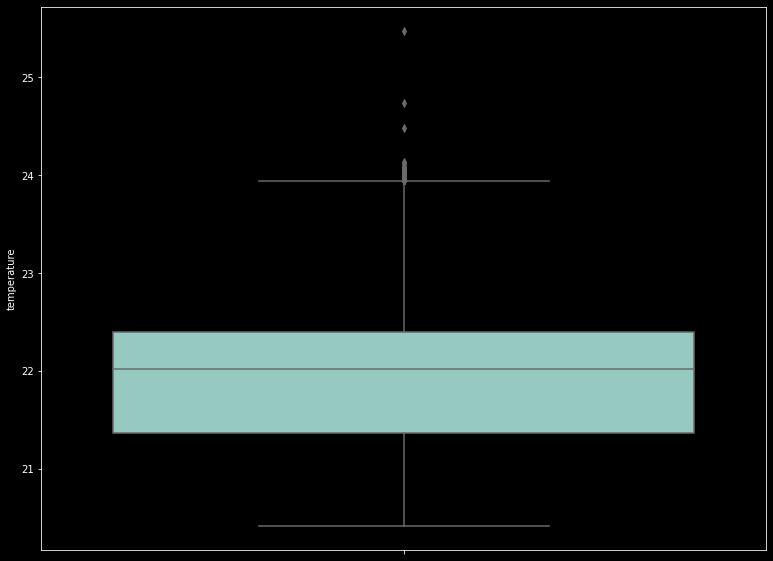

In [80]:
sns.boxplot(y="temperature", data=df)

<AxesSubplot:>

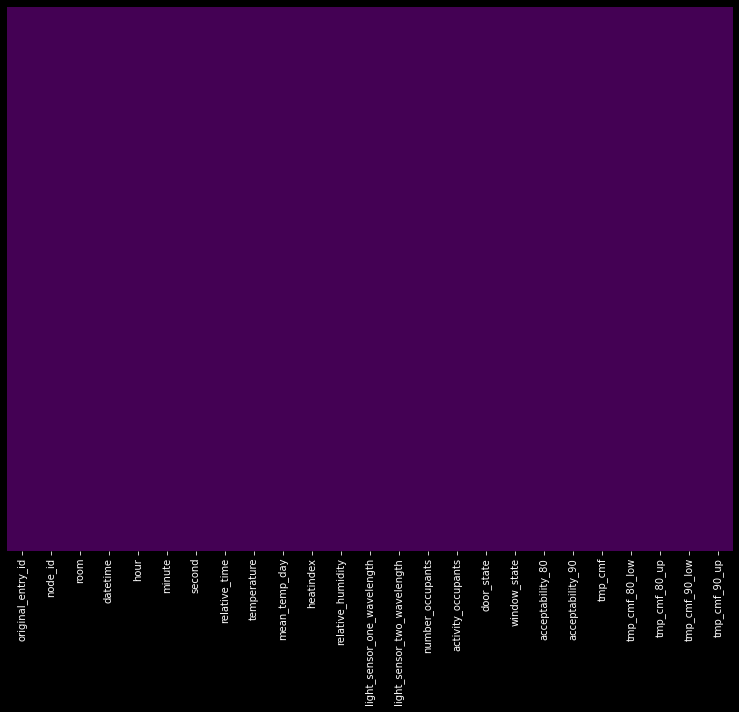

In [81]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [82]:
df.columns 

Index(['original_entry_id', 'node_id', 'room', 'datetime', 'hour', 'minute',
       'second', 'relative_time', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

In [83]:
df.head()

,original_entry_id,node_id,room,datetime,hour,minute,second,relative_time,temperature,mean_temp_day,...,activity_occupants,door_state,window_state,acceptability_80,acceptability_90,tmp_cmf,tmp_cmf_80_low,tmp_cmf_80_up,tmp_cmf_90_low,tmp_cmf_90_up
0,1,1,A,2016-03-15 08:47:28.545,8,47,28,1,20.48,4.0,...,0,0,0,0,0,20.9,21.3,22.5,21.1,22.0
1,2,4,A,2016-03-15 08:47:28.645,8,47,28,1,20.73,4.0,...,0,0,0,0,0,20.9,21.3,22.5,21.1,22.0
2,3,3,A,2016-03-15 08:47:28.795,8,47,28,1,20.48,4.0,...,0,0,0,0,0,20.9,21.3,22.5,21.1,22.0
3,4,2,A,2016-03-15 08:47:31.038,8,47,31,3,20.89,4.0,...,0,0,0,0,0,20.9,21.3,22.5,21.1,22.0
4,5,4,A,2016-03-15 08:47:32.010,8,47,32,4,20.73,4.0,...,0,0,0,0,0,20.9,21.3,22.5,21.1,22.0


In [84]:
df['datetime'] =pd.to_datetime(df.datetime)
df = df.sort_values(by='datetime')
def create_year_column(row):
    if row['datetime'].year == 2017:
        return 2017
    else:
        return 2016


df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

In [85]:
df

,original_entry_id,node_id,room,datetime,hour,minute,second,relative_time,temperature,mean_temp_day,...,window_state,acceptability_80,acceptability_90,tmp_cmf,tmp_cmf_80_low,tmp_cmf_80_up,tmp_cmf_90_low,tmp_cmf_90_up,year,month
0,1,1,A,2016-03-15 08:47:28.545,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
1,2,4,A,2016-03-15 08:47:28.645,8,47,28,1,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
2,3,3,A,2016-03-15 08:47:28.795,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
3,4,2,A,2016-03-15 08:47:31.038,8,47,31,3,20.89,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
4,5,4,A,2016-03-15 08:47:32.010,8,47,32,4,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540359,4554,1,C,2017-02-03 18:32:26.309,18,32,26,3643,22.18,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540360,4555,4,C,2017-02-03 18:32:26.338,18,32,26,3643,22.27,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540361,4556,1,C,2017-02-03 18:32:29.551,18,32,29,3646,22.19,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540362,4557,5,C,2017-02-03 18:32:29.840,18,32,29,3646,21.98,7.3,...,0,1,1,20.9,21.3,22.5,21.1,22.0,2017,2


# Multivariate

## temperature

TODO: make it so its mean temp per hour per selected month

In [86]:
df[["temperature",]].mean()

temperature    21.966373
dtype: float64

In [87]:
df

,original_entry_id,node_id,room,datetime,hour,minute,second,relative_time,temperature,mean_temp_day,...,window_state,acceptability_80,acceptability_90,tmp_cmf,tmp_cmf_80_low,tmp_cmf_80_up,tmp_cmf_90_low,tmp_cmf_90_up,year,month
0,1,1,A,2016-03-15 08:47:28.545,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
1,2,4,A,2016-03-15 08:47:28.645,8,47,28,1,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
2,3,3,A,2016-03-15 08:47:28.795,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
3,4,2,A,2016-03-15 08:47:31.038,8,47,31,3,20.89,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
4,5,4,A,2016-03-15 08:47:32.010,8,47,32,4,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540359,4554,1,C,2017-02-03 18:32:26.309,18,32,26,3643,22.18,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540360,4555,4,C,2017-02-03 18:32:26.338,18,32,26,3643,22.27,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540361,4556,1,C,2017-02-03 18:32:29.551,18,32,29,3646,22.19,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540362,4557,5,C,2017-02-03 18:32:29.840,18,32,29,3646,21.98,7.3,...,0,1,1,20.9,21.3,22.5,21.1,22.0,2017,2


In [88]:
date_mean_2016 = df[df['year'] == 2016]
date_mean_2017 = df[df['year'] == 2017]

In [89]:
date_mean_2016

,original_entry_id,node_id,room,datetime,hour,minute,second,relative_time,temperature,mean_temp_day,...,window_state,acceptability_80,acceptability_90,tmp_cmf,tmp_cmf_80_low,tmp_cmf_80_up,tmp_cmf_90_low,tmp_cmf_90_up,year,month
0,1,1,A,2016-03-15 08:47:28.545,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
1,2,4,A,2016-03-15 08:47:28.645,8,47,28,1,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
2,3,3,A,2016-03-15 08:47:28.795,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
3,4,2,A,2016-03-15 08:47:31.038,8,47,31,3,20.89,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
4,5,4,A,2016-03-15 08:47:32.010,8,47,32,4,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418933,5857,1,B,2016-04-27 12:34:51.502,12,34,51,7824,22.65,5.6,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,4
418934,5858,2,B,2016-04-27 12:34:52.152,12,34,52,7825,22.33,5.6,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2016,4
418935,5859,2,B,2016-04-27 12:34:55.519,12,34,55,7828,22.34,5.6,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2016,4
418936,5860,1,B,2016-04-27 12:34:55.993,12,34,55,7829,22.66,5.6,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,4


In [90]:
date_mean_2017

,original_entry_id,node_id,room,datetime,hour,minute,second,relative_time,temperature,mean_temp_day,...,window_state,acceptability_80,acceptability_90,tmp_cmf,tmp_cmf_80_low,tmp_cmf_80_up,tmp_cmf_90_low,tmp_cmf_90_up,year,month
418938,1,5,C,2017-01-25 14:05:09.917,14,5,9,1,22.03,-3.0,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,1
418939,2,3,C,2017-01-25 14:05:10.203,14,5,10,1,22.11,-3.0,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,1
418940,3,4,C,2017-01-25 14:05:10.233,14,5,10,1,22.00,-3.0,...,0,1,1,20.9,21.3,22.5,21.1,22.0,2017,1
418941,4,2,C,2017-01-25 14:05:10.547,14,5,10,2,22.12,-3.0,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,1
418942,5,1,C,2017-01-25 14:05:10.773,14,5,10,2,22.31,-3.0,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540359,4554,1,C,2017-02-03 18:32:26.309,18,32,26,3643,22.18,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540360,4555,4,C,2017-02-03 18:32:26.338,18,32,26,3643,22.27,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540361,4556,1,C,2017-02-03 18:32:29.551,18,32,29,3646,22.19,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540362,4557,5,C,2017-02-03 18:32:29.840,18,32,29,3646,21.98,7.3,...,0,1,1,20.9,21.3,22.5,21.1,22.0,2017,2


<AxesSubplot:>

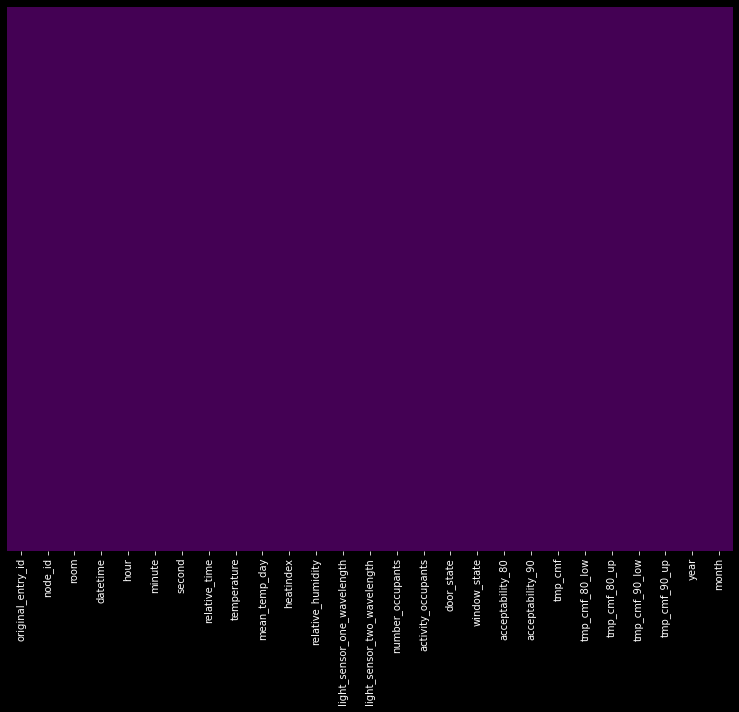

In [91]:
sns.heatmap(date_mean_2016.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
mean_dict_2016 = {}
for index, row in date_mean_2016.iterrows():
    month = row['month']
    if month not in mean_dict_2016:
        mean_dict_2016[month] = date_mean_2016[date_mean_2016['month'] == month]['temperature'].mean()


mean_dict_2017 = {}
for index, row in date_mean_2017.iterrows():
    month = row['month']
    if month not in mean_dict_2017:
        mean_dict_2017[month] = date_mean_2017[date_mean_2017['month'] == month]['temperature'].mean()        

mean_dict_both = {}
for index, row in df.iterrows():
    month = row['month']
    year = row['year']
    year_month = str(month) + "/" + str(year)
    if year_month not in mean_dict_both:
        month_frame = df[df['month'] == month] 
        year_frame = month_frame[month_frame['year'] == year] 
        mean_dict_both[year_month] =  year_frame['temperature'].mean()

In [ ]:
mean_dict_2017 = pd.DataFrame(data=mean_dict_2017.items(), columns=['datetime', 'mean'])
mean_dict_2016 = pd.DataFrame(data=mean_dict_2016.items(), columns=['datetime', 'mean'])
mean_dict = pd.DataFrame(data=mean_dict_both.items(), columns=['datetime', 'mean'])

In [ ]:
mean_dict_2017

,datetime,mean
0,1,22.111880
1,2,22.195458


In [ ]:
mean_dict_2016

,datetime,mean
0,3,21.383236
1,4,22.598361


In [ ]:
mean_dict

,datetime,mean
0,3/2016,21.383236
1,4/2016,22.598361
2,1/2017,22.111880
3,2/2017,22.195458


In [ ]:
def create_year_column(row):
    if "2017" in row['datetime'] :
        return 2017
    else:
        return 2016

In [ ]:
df

,original_entry_id,node_id,room,datetime,hour,minute,second,relative_time,temperature,mean_temp_day,...,window_state,acceptability_80,acceptability_90,tmp_cmf,tmp_cmf_80_low,tmp_cmf_80_up,tmp_cmf_90_low,tmp_cmf_90_up,year,month
0,1,1,A,2016-03-15 08:47:28.545,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
1,2,4,A,2016-03-15 08:47:28.645,8,47,28,1,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
2,3,3,A,2016-03-15 08:47:28.795,8,47,28,1,20.48,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
3,4,2,A,2016-03-15 08:47:31.038,8,47,31,3,20.89,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
4,5,4,A,2016-03-15 08:47:32.010,8,47,32,4,20.73,4.0,...,0,0,0,20.9,21.3,22.5,21.1,22.0,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540359,4554,1,C,2017-02-03 18:32:26.309,18,32,26,3643,22.18,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540360,4555,4,C,2017-02-03 18:32:26.338,18,32,26,3643,22.27,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540361,4556,1,C,2017-02-03 18:32:29.551,18,32,29,3646,22.19,7.3,...,0,1,0,20.9,21.3,22.5,21.1,22.0,2017,2
540362,4557,5,C,2017-02-03 18:32:29.840,18,32,29,3646,21.98,7.3,...,0,1,1,20.9,21.3,22.5,21.1,22.0,2017,2


In [ ]:
mean_dict['year'] = mean_dict.apply(create_year_column, axis=1)

In [ ]:
mean_dict

,datetime,mean,year
0,3/2016,21.383236,2016
1,4/2016,22.598361,2016
2,1/2017,22.111880,2017
3,2/2017,22.195458,2017


<AxesSubplot:xlabel='year', ylabel='temperature'>

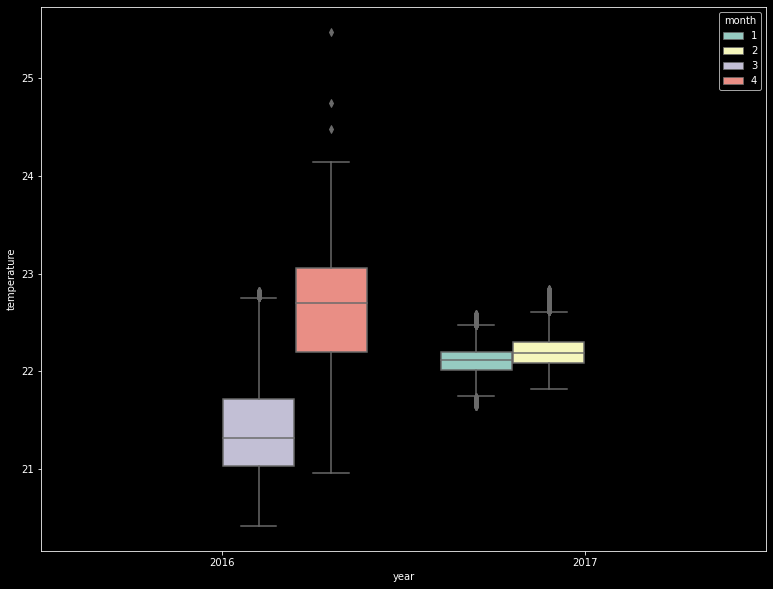

In [ ]:
sns.boxplot(y="temperature", data=df, x="year", hue="month")

<AxesSubplot:xlabel='year', ylabel='temperature'>

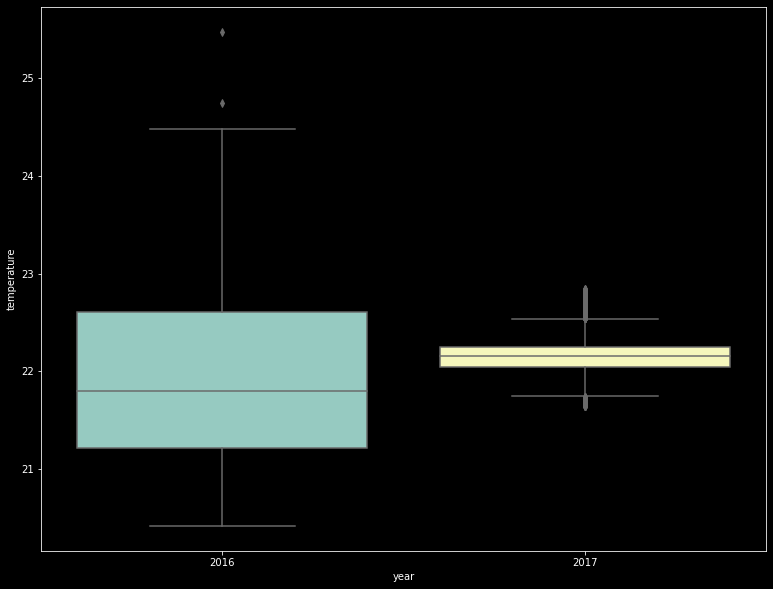

In [ ]:
sns.boxplot(y="temperature", data=df, x="year")

<AxesSubplot:xlabel='room', ylabel='temperature'>

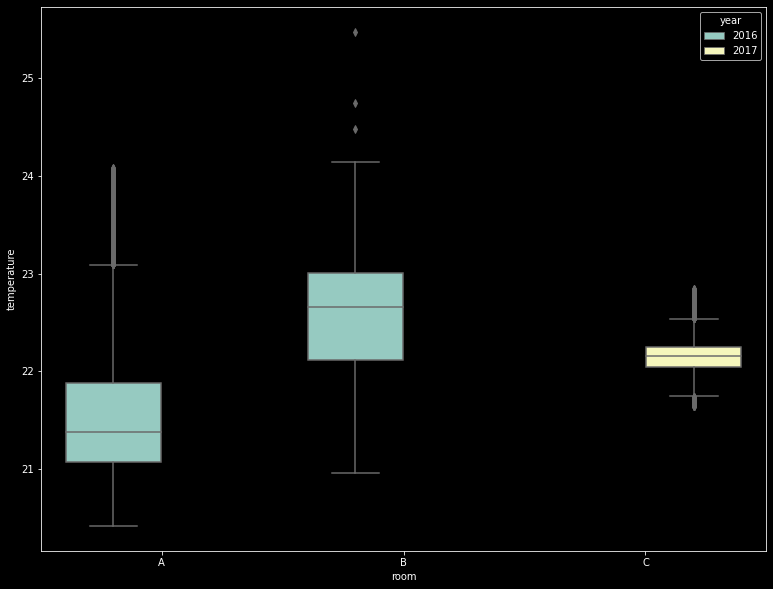

In [ ]:
sns.boxplot(y="temperature", data=df, x="room", hue="year")

<AxesSubplot:ylabel='temperature'>

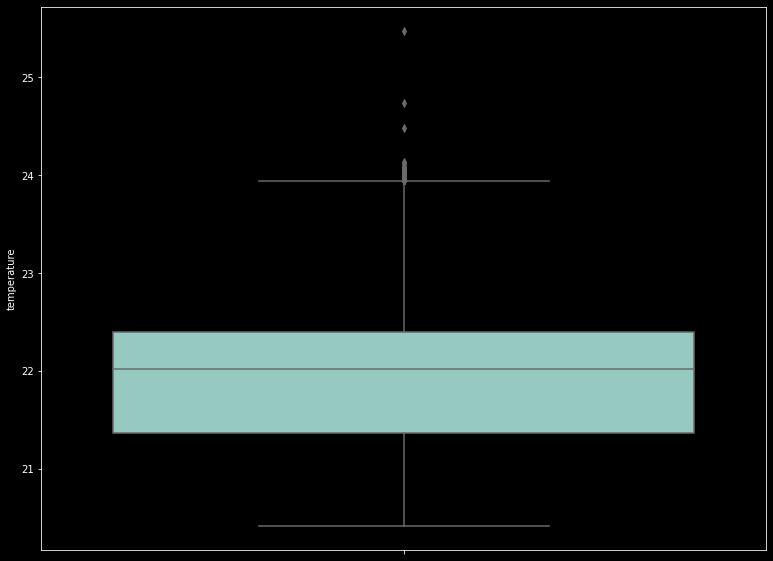

In [ ]:
sns.boxplot(y="temperature", data=df)

## Heatmap

In [ ]:
def convert_room(x):
    if(str(x).upper() == 'A'):
        return 0
    if(str(x).upper() == 'B'):
        return 1
    if(str(x).upper() == 'C'):
        return 2
    else:
        return -1
df['room'] = df['room'].apply(convert_room)

<AxesSubplot:>

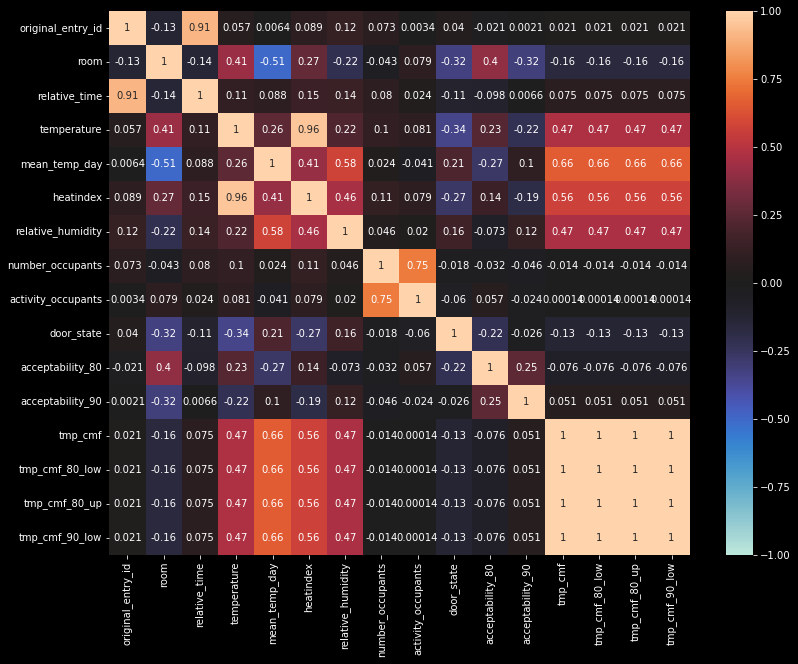

In [ ]:
plt.rcParams["figure.figsize"] = (13,10)
mask = df[['original_entry_id', 'room', 
       'relative_time',  'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity',  'number_occupants', 'activity_occupants',
       'door_state','acceptability_80', 'acceptability_90', 
       'tmp_cmf', 
       'tmp_cmf_80_low', 
       'tmp_cmf_80_up', 
       'tmp_cmf_90_low']]
sns.heatmap(df.corr(method="spearman"), annot = True,  vmin =-1, vmax = 1, center = 0)